<h1>Analisis Trending YouTube Video di Amerika</h1>
<h3>Disusun oleh : Agus Waluyo</h3>
<p>Project ini bertujuan untuk menganalisis data tentang Video yang jadi trending di Youtube.</p>
<p> Menurut majalah Variety pada tahun 2018, seorang Yutuber bisa menjadi trending di YouTube jika memenuhi persyaratan dari Youtube. YouTube menggunakan beberapa faktor untuk menentukan Video yang layak jadi trending di platformnya, termasuk mengukur interaksi pengguna (jumlah dari views, shares, comments and likes)</p>

Sumber data dari [USvideos_modified.csv](https://www.kaggle.com/sgonkaggle/youtube-trend-with-subscriber).

<h3>langkah pertama kita import dulu Library yang dibutuhkan untuk mengolah datanya, selanjutnya ubah dataset yang dipilih ke dalam bentuk Dataframe menggunakan Panda</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

selling = "D:\\USvideos_modified.csv"
data = pd.read_csv(selling)
data.head()

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


In [2]:
len(data)

4547

In [3]:
# Total jumlah baris dan kolom.
print(data.shape)

(4547, 23)


In [4]:
# mengecek apakah ada duplikat
print("video_id: "+ str(data.index.nunique()))

video_id: 4547


Ternyata tidak data yang terduplikat, hal itu karena <b>Index.nunique ()</b> berfungsi mengembalikan jumlah elemen unik dalam objek. Ini mengembalikan nilai skalar yang merupakan jumlah semua nilai unik dalam Indeks. Secara default, nilai NaN(not a number) tidak termasuk dalam hitungan. Jika parameter dropna disetel ke False maka itu termasuk nilai NaN dalam hitungan.

In [5]:
# Number of unique values for each column.
print(data.nunique())

video_id                       4547
last_trending_date              110
publish_date                    211
publish_hour                     24
category_id                      16
channel_title                  1905
views                          4532
likes                          3949
dislikes                       1842
comment_count                  2645
comments_disabled                 2
ratings_disabled                  2
tag_appeared_in_title_count      18
tag_appeared_in_title             2
title                          4540
tags                           4190
description                    4415
trend_day_count                  14
trend.publish.diff              127
trend_tag_highest               111
trend_tag_total                1256
tags_count                       65
subscriber                     1831
dtype: int64


In [6]:
#mencari data yang kosong dan tipe dari data kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 23 columns):
video_id                       4547 non-null object
last_trending_date             4547 non-null object
publish_date                   4547 non-null object
publish_hour                   4547 non-null int64
category_id                    4547 non-null int64
channel_title                  4547 non-null object
views                          4547 non-null int64
likes                          4547 non-null int64
dislikes                       4547 non-null int64
comment_count                  4547 non-null int64
comments_disabled              4547 non-null bool
ratings_disabled               4547 non-null bool
tag_appeared_in_title_count    4547 non-null int64
tag_appeared_in_title          4547 non-null bool
title                          4547 non-null object
tags                           4339 non-null object
description                    4458 non-null object
trend_day_count       

Pada langkah selanjutnya, kita akan melakukan pembersihan data terlebih dahulu<b>(data cleaning)</b>. Disini metode yang saya pakai untuk cleaning data adalah menghapus data yang kosong(null), untuk itu saya akan mengecek satu persatu kolom/feature yang ada pada data yang digunakan(US_Videos), total kolom ada 23, semuanya kita cek satu-satu.

In [7]:
data[data['video_id'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [8]:
data[data['last_trending_date'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [9]:
data[data['publish_date'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [10]:
data[data['publish_hour'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [11]:
data[data['category_id'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [12]:
data[data['channel_title'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [13]:
data[data['views'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [14]:
data[data['likes'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [15]:
data[data['dislikes'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [16]:
data[data['comment_count'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [17]:
data[data['comments_disabled'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [18]:
data[data['ratings_disabled'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [19]:
data[data['tag_appeared_in_title_count'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [20]:
data[data['tag_appeared_in_title'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [21]:
data[data['title'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [22]:
data[data['tags'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
42,NZFhMSgbKKM,2017-11-18,2017-11-13,15,17,Ben Rohrbach,22302,83,75,63,...,False,Dennis Smith Jr. and LeBron James go back and ...,NaN,NaN,5,5,0,0,0,517.0
97,xfmipNU4Odc,2017-11-16,2017-11-10,18,15,Hope For Paws - Official Rescue Channel,339256,17267,85,948,...,False,Edna's registered owner thought she was dead f...,NaN,Please donate $5 and help us save more lives:\...,3,6,0,0,0,2205605.0
133,X7flefV8tec,2017-11-15,2017-11-09,2,24,Team Coco,379918,4472,4507,2066,...,False,"President Bill Clinton On Dictators, Democracy...",NaN,#ConanNYC Highlight: President Clinton talks a...,2,6,0,0,0,5600865.0
136,5x1FAiIq_pQ,2017-11-14,2017-11-09,15,10,Alicia Keys,95944,1354,181,117,...,False,Alicia Keys - When You Were Gone,NaN,Find out more in The Vault: http://bit.ly/AK_A...,1,5,0,0,0,198682.0
175,4d07RXYLsJE,2017-11-14,2017-11-04,20,28,Jenny Hanell,1827,3,0,2,...,False,Sphaera - demonstrating interaction,NaN,NaN,1,10,0,0,0,5.0
178,JuP1Z8xpRb8,2017-11-14,2017-11-09,17,24,BrianJustinCrum,27010,1666,36,150,...,False,Brian Justin Crum - Wild Side,NaN,Get the new single 'Wild Side' now! http://sma...,1,5,0,0,0,112761.0
180,1640fZpYBSY,2017-11-14,2017-11-07,18,22,Anaki Abo,358597,1211,72,593,...,False,I love the Price is Right! Wooo! -Kevin,NaN,Price is Right contestant plays for a car.,1,7,0,0,0,25.0
187,Mfiim71QdYQ,2017-11-14,2017-11-08,18,25,Chicago Sun-Times,33768,426,88,550,...,False,Obama arrives for jury duty at Daley Center,NaN,Watch former President Barack Obama greet othe...,1,6,0,0,0,11133.0
192,wRGldR_SQAA,2017-11-14,2017-11-09,18,22,Steve Kovach,2259,0,0,0,...,False,Apple Clips sample,NaN,Clips 2.0 lets you use augmented reality and s...,1,5,0,0,0,325.0
201,cxMvzK2OQTw,2017-11-22,2017-11-14,16,23,Cards Against Humanity,1365087,25811,8876,6604,...,False,Cards Against Humanity Saves America,NaN,Narrated by Peter Coyote\nSign up at: www.Card...,8,8,0,0,0,17212.0


In [23]:
data[data['description'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
42,NZFhMSgbKKM,2017-11-18,2017-11-13,15,17,Ben Rohrbach,22302,83,75,63,...,False,Dennis Smith Jr. and LeBron James go back and ...,NaN,NaN,5,5,0,0,0,517.0
47,sbcbvuitiTc,2017-11-15,2017-11-10,18,17,NBA Highlights · YouTube,1015189,2133,2483,1465,...,False,Stephon Marbury and Jimmer Fredette fight in C...,NBA|Basketball|Sports,NaN,2,5,111,302,3,2720.0
175,4d07RXYLsJE,2017-11-14,2017-11-04,20,28,Jenny Hanell,1827,3,0,2,...,False,Sphaera - demonstrating interaction,NaN,NaN,1,10,0,0,0,5.0
295,upEIZAihcwo,2017-11-20,2017-11-15,17,17,NBA Highlights · YouTube,20541,10,103,16,...,True,Devin Booker has words with Lakers assistant J...,NBA|Basketball|Sports|Los Angeles Lakers|Phoen...,NaN,5,5,111,312,6,2720.0
348,U5sCjnezw4o,2017-11-23,2017-11-17,4,25,MassLive,133758,781,94,308,...,False,Jaylen Brown delivers emotional press conferen...,auth-jking413-auth|Jay-King,NaN,7,6,1,2,2,9416.0
451,aHsfKnrNCG4,2017-11-21,2017-11-14,13,10,daronjay,3896,9,0,1,...,False,mad eye moody - moving eyeball prop,NaN,NaN,3,7,0,0,0,4.0
452,CvpwGru3s7s,2017-11-20,2017-11-06,17,24,Taras Malyar,2665,11,0,0,...,False,BALL SURPRISE PRANK (woody and kleiny),NaN,NaN,2,14,0,0,0,0.0
454,aujUl3yt6nM,2017-11-21,2017-11-16,1,22,Quad9 DNS,5963,47,2,13,...,False,Quad9 How To Install with Windows,DNS|privacy|security,NaN,3,5,10,16,3,273.0
504,aVpvVq_yZLM,2017-11-27,2017-11-20,16,25,The View,170075,696,849,1257,...,True,Second Woman Accuses Sen. Al Franken Of Inappr...,al franken|roy moore|politics|senate|the view|...,NaN,7,7,86,214,10,381107.0
579,kKFNThEiilU,2017-11-29,2017-11-21,2,22,Doug Jones for Senate,163043,1456,396,621,...,False,Voices,NaN,NaN,8,8,0,0,0,718.0


In [24]:
data[data['trend_day_count'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [25]:
data[data['trend.publish.diff'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [26]:
data[data['trend_tag_highest'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [27]:
data[data['trend_tag_total'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [28]:
data[data['tags_count'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [29]:
data[data['subscriber'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
185,hX643KbiI4s,2017-11-14,2017-11-08,21,24,Tu Fan,82087,998,93,289,...,True,Selena Gomez Singing Wolves and It Ain't Me FU...,selena gomez instagram full|instagram live sel...,Selena Gomez Singing on Instagram November 8 FULL,1,6,79,171,9,NaN
449,p7KHGUwqF24,2017-11-21,2017-11-16,13,25,FlyFastandLow,4351,10,0,0,...,True,Flying the Textron Scorpion,Textron|Scorpion|ScorpionJet|Textron Defense|L...,Demonstration Flight in the Textron Scorpion r...,3,5,1,7,7,NaN
466,n6xzsLDzyBk,2017-11-20,2017-11-20,2,23,ladygagaarraza,18916,1425,28,180,...,True,Lady Gaga - The Cure (Live at AMA's from Joann...,American Music Awards|AMA|Lady Gaga|The Cure|A...,Lady Gaga performing The Cure live from Joanne...,1,0,126,183,11,NaN
468,WXlr35jV3cw,2017-11-22,2017-11-20,3,10,mvt.ias,191326,3067,287,558,...,True,P!nk presentation on AMAs 2017,music|chill|trap|lyrics|musica|letras|vaporwav...,Suscribe :),3,2,171,305,21,NaN
542,A_mlvG_nRsg,2017-11-22,2017-10-28,11,17,Rob Andretti,2447,0,3,1,...,False,Kelly Oubre Punches John Wall in the Lead duri...,NaN,I'm BACK! \n\n• Will you be apart of the take ...,2,25,0,0,0,NaN
775,Ort8rZdpoXo,2017-12-03,2017-11-27,3,24,Technomanila,38600,140,90,519,...,True,Miss Universe Crowd Shouts 'Boo!' Not Happy wi...,Jamaica|Boos|Miss Universe 2017|Colombia|Phili...,Boos were heard inside the Miss Universe 2017 ...,6,6,7,22,9,NaN
999,Fq0cNEAbsJE,2017-12-03,2017-11-29,3,24,Flash Rahbbit,7436,170,8,59,...,True,Crisis on Earth-X - Snart & The Ray Kiss,The|Flash|Season|Wally|West|Jesse|Quick|Harris...,CONTAINS SPOILERS\nA clips from The Flash Seas...,2,4,67,176,20,NaN
1205,yyr51Kznab4,2017-12-13,2017-12-06,17,22,MoorInfo,178900,4152,578,1254,...,False,MUST WATCH!! Viewer calls News Anchor the NWOR...,tariq nasheed|tommy sotomayor|problack|alex jo...,FOLLOW ALL FOR MOOR INFO\n\n✅INSTAGRAM: https:...,6,7,17,86,33,NaN
1733,csqXekWeBYo,2017-12-23,2017-12-18,19,22,Sports Lovers n1,35916,0,0,70,...,True,Dan Le Batard Breaks Down On Air After John Sk...,Dan Le Batard|John Skipper|Media News|Media,Dan Le Batard Tears Up Upon Learning About Joh...,5,5,8,13,4,NaN
1985,6ULZDwevR0M,2017-12-24,2017-12-21,13,27,Republican News Watch,3596,20,4,13,...,False,IVANKA TRUMP FULL ONE-ON-ONE INTERVIEW ON FOX ...,IVANKA TRUMP FULL ONE-ON-ONE INTERVIEW ON FOX ...,IVANKA TRUMP FULL ONE-ON-ONE INTERVIEW ON FOX ...,1,3,1,2,2,NaN


<b>Setelah menemukan feature mana yang memiliki nilai null, maka selanjutnya dapat dilakukan pembersihan dengan mengganti nilai null atau menghapus data yang bernilai null.  </b><br>
<b>Pada project ini, saya memilih untuk menghapus data yang bernilai  null</b>

In [30]:
data2 = data.dropna(axis=0, how='any')

Untuk meyakinkan data yang sudah dihapus benar-benar hilang, maka coba kita cek lagi feature yang memiliki data null (subscriber,description,dan tags)  

In [31]:
data2[data2['subscriber'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [32]:
data2[data2['description'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [33]:
data2[data2['tags'].isnull()]

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber


In [34]:
def num_missing(x):
  return sum(x.isnull())
print ("Missing values per column:")
print (data2.apply(num_missing, axis=0))

Missing values per column:
video_id                       0
last_trending_date             0
publish_date                   0
publish_hour                   0
category_id                    0
channel_title                  0
views                          0
likes                          0
dislikes                       0
comment_count                  0
comments_disabled              0
ratings_disabled               0
tag_appeared_in_title_count    0
tag_appeared_in_title          0
title                          0
tags                           0
description                    0
trend_day_count                0
trend.publish.diff             0
trend_tag_highest              0
trend_tag_total                0
tags_count                     0
subscriber                     0
dtype: int64


<b>Oke, terkonfirmasi yak !</b>
<b>Semua Data Sudah Kita Bersihkan dari data yang Null</b>
<p>Proses selanjutnya adalah membuat <b>Scatter Plot </b> untuk masing - masing features yang terdapat pada data.<br>
Pembuatan scatter plot, digunakan untuk memudahkan kita dalam memilih 2 features yang diduga memiliki korelasi yang kuat satu sama lain.</p>

In [35]:
#fig = px.scatter_matrix(data2)
#fig.show()

In [36]:
#%matplotlib inline

#sns.pairplot(data2, height=3)

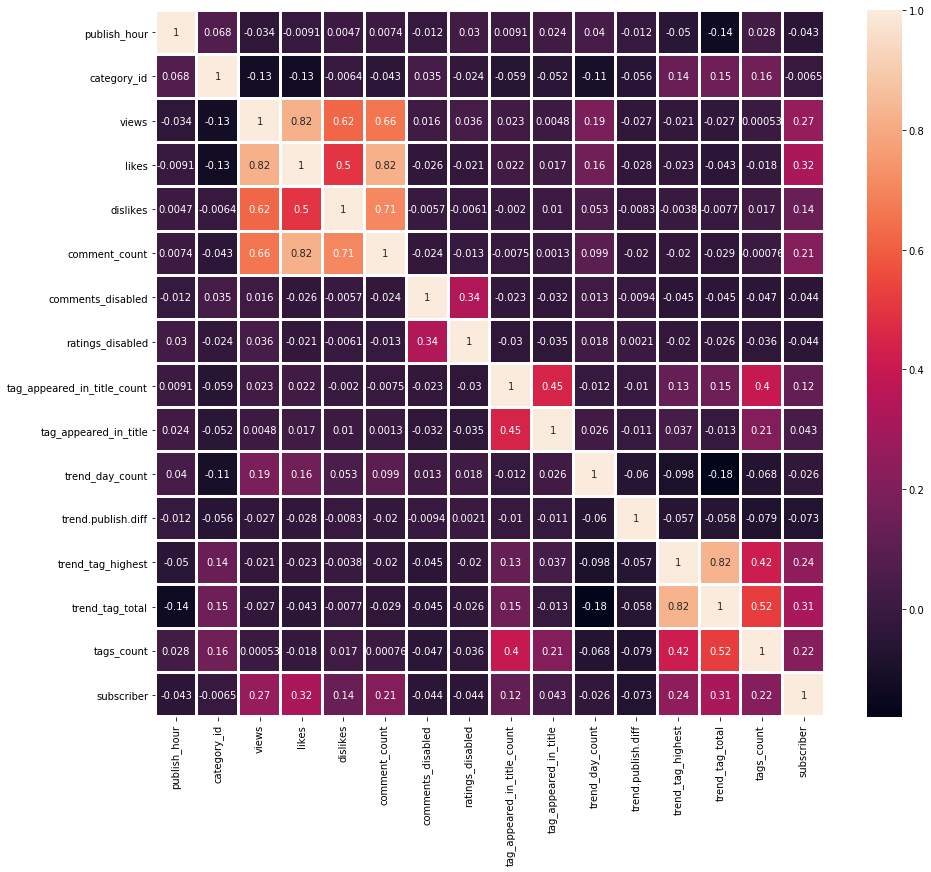

In [37]:
#f, ax = plt.subplots(figsize=(10, 8))
#corr = data2.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            #square=True, ax=ax)
    
import seaborn as sns 
plt.figure(figsize=(15,13))
sns.heatmap(data2.corr(),annot=True,linewidths=2)

<h3>Berdasarkan pola data dari scatter plot (No. 1), pilih 2 features yang memiliki dugaan kuat ada korelasi</h3>
<p>Berdasarkan heatmap diatas kita dapat menduga bahwa <b>Views dengan Likes</b> memiliki korelasi yang kuat.</p>
<p>Dapat kita ketahui di heatmap, views dengan likes mempunyai warna coklat muda dengan indeks 0.82(mendekati 1) yang menandakan korelasi yang kuat</p>

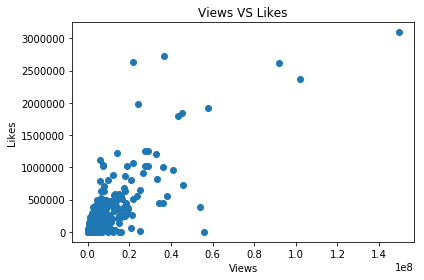

In [38]:
plt.scatter(data2.views, data2['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views VS Likes')

plt.tight_layout()
plt.show()

<b>Analisis</b>

Dari Dataset di atas, Video yang paling banyak views nya juga memiliki likes paling banyak. Variabel ini memiliki korelasi terkuat dengan pandangan semua yang diperiksa di sini.

<h3>Untuk memperjelasnya, kita buatkan statistik deskriptif dari 2 features yang dipilih beserta narasinya terhadap statistik tersebut</h3>

In [39]:
data2[['views','likes']].describe()

,views,likes
count,4.278000e+03,4.278000e+03
mean,1.284121e+06,4.039107e+04
std,4.580088e+06,1.439596e+05
min,5.590000e+02,0.000000e+00
25%,9.737100e+04,1.676500e+03
50%,3.327670e+05,7.933000e+03
75%,1.033871e+06,2.669800e+04
max,1.493761e+08,3.093544e+06


Dari kode diatas, kita tahu jumlah data, rata-rata, standart deviasi, nilai min, nilai max,dll dari feature views dan likes.

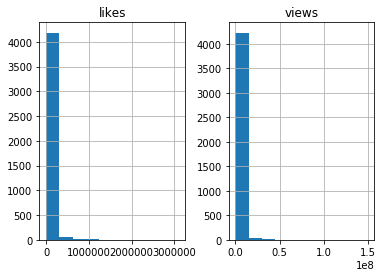

In [40]:
viz = data2[['views','likes']]

viz.hist()
plt.show()

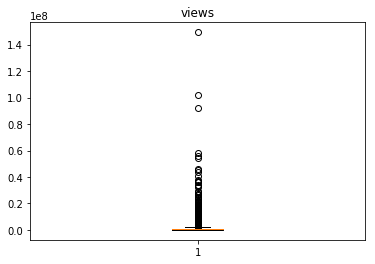

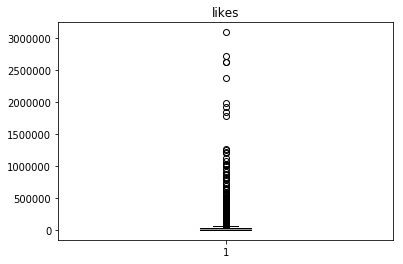

In [41]:
#box plot
plt.boxplot(data2['views'])
plt.title("views")
plt.show()

plt.boxplot(data2['likes'])
plt.title("likes")
plt.show()

<h3>Penjelasan : informasi yang didapat dari box plot di atas adalah bahwa range data views adalah dari 0 sampai dengan 1.4 x 1e8.  Sedangkan data likes memiliki range 0 sampai dengan 3.000.000</h3>

<h1> Langkah selanjutnya kita mulai Proses Analisis</h1>

<p>Sebelum memulai analisis kita lakukan dulu pembersihan terhadap dataset, langkah pertama kita <b>Identifying Outliers (Pencilan)</b></p>

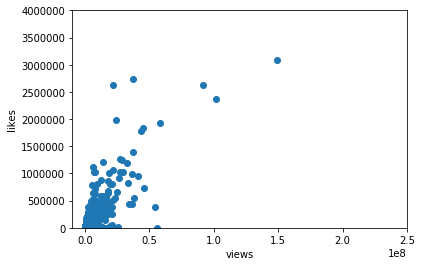

In [42]:
# mengidentifikasi outliers via scatter plot

import matplotlib.pyplot as plt
plt.scatter(data['views'], data['likes'])
plt.xlabel('views')
plt.ylabel('likes')
plt.xlim(-1e7, 2.5e8)
plt.ylim(-1,4000000)
plt.show()

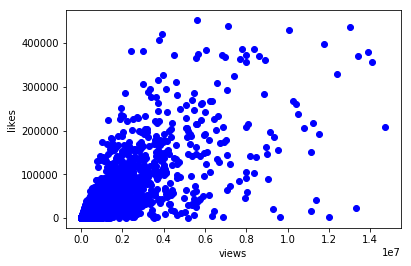

In [43]:
# menghilangkan outliers
meanview = data2['views'].mean()
stdview = data2['views'].std()
meanlikes = data2['likes'].mean()
stdlikes = data2['likes'].std()

dataClean = data2[(np.abs((data2['views']-meanview)/stdview) <= 3) 
                 & (np.abs((data2['likes']-meanlikes)/stdlikes) <= 3)]

# scatter plot setelah menghilangkan outliers
plt.scatter(dataClean['views'], dataClean['likes'], color='blue')
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

<b> Dari scatter plot di atas bisa kita lihat pencilan/outliers yang sudah dibuang. Hal tersebut dapat kita lihat dari perbedaan angka pada 2 scatter plot diatas. Angka Scatter yang terakhir menjadi lebih kecil</b>

<h3>Analisis Model Regresi</h3>
<h3>* Diduga likes dan views memiliki korelasi, sehingga akan dilakukan analisis Regresi Linear Sederhana untuk mengetahui pengaruh views terhadap likes.</h3>

In [44]:
# Menentukan data training dan data testing

msk = np.random.rand(len(dataClean)) < 0.8
train = dataClean[msk]
test = dataClean[~msk]

In [45]:
#tentukan b0 dan b1
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[['views']])
train_y = np.array(train[['likes']])
regr.fit (train_x, train_y)

# Parameter Model
print ('Intercept: ',regr.intercept_)
print ('Coefficients: ', regr.coef_)

Intercept:  [4028.43338527]
Coefficients:  [[0.02588624]]


Text(0, 0.5, 'likes')

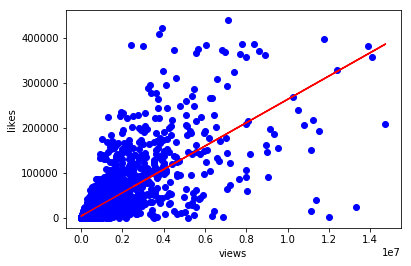

In [46]:
plt.scatter(train.views, train.likes,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("views")
plt.ylabel("likes")

In [47]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['views']])
test_y = np.asanyarray(test[['likes']])
test_y_ = regr.predict(test_x)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error (MAE): 15979.25
Residual sum of squares (MSE): 1224065602.63
R2-score: 0.17


* <b>Dari hasil diatas, didapat model Regresi Linear Sederhana y = 3940.7546 + 0.0263(X1) dengan nilai MSE model = 16230.75. Nilai R2 = 0.19 dapat diartikan bahwa sebesar 19% variabel views mempengaruhi likes.

<h3>Non Linier Regresi :</h3>

1. Sigmoid
2. Exponensial

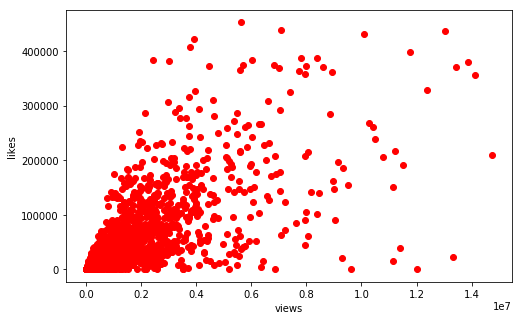

In [48]:
plt.figure(figsize=(8,5))
x_data, y_data = (dataClean["views"].values, dataClean["likes"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('likes')
plt.xlabel('views')
plt.show()

 beta_1 sigmoid = 6.002954, beta_2 sigmoid = 0.517906


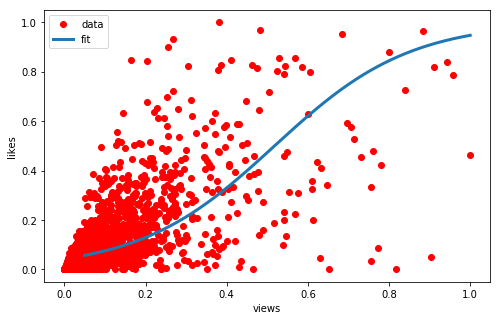

In [49]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

# Lets normalize our data (sigmoid)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print(" beta_1 sigmoid = %f, beta_2 sigmoid = %f" % (popt[0], popt[1]))

x = np.linspace(10, 200, 1000)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('likes')
plt.xlabel('views')
plt.show()

 beta_1 exponential = 0.053547, beta_2 exponential= 3.109966


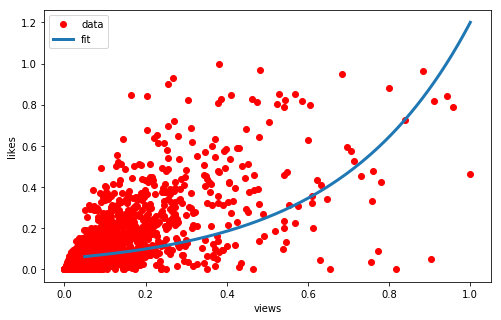

In [50]:
def exponential(xe, Beta_1e, Beta_2e):
    ye = Beta_1e * (np.exp(Beta_2e*xe))
    return ye

# Lets normalize our data (exponential)
xdatae =x_data/max(x_data)
ydatae =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, xdatae, ydatae,maxfev=10000)

#print the final parameters
print(" beta_1 exponential = %f, beta_2 exponential= %f" % (popt[0], popt[1]))

xe = np.linspace(10, 200, 1000)
xe = xe/max(xe)
plt.figure(figsize=(8,5))
ye = exponential(xe, *popt)
plt.plot(xdatae, ydatae, 'ro', label='data')
plt.plot(xe,ye, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('likes')
plt.xlabel('views')
plt.show()

In [51]:
msk = np.random.rand(len(dataClean)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y, maxfev=10000)
popt2, pcov = curve_fit(exponential, train_x, train_y, maxfev=10000)

# predict using test set
y_hat = sigmoid(test_x, *popt)
y_hat2 = exponential(test_x, *popt2)

# evaluation/ mengukur tingkat keakuratan
print("Mean absolute error (MAE) sigmoid : %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE) sigmoid: %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score sigmoid : %.2f" % r2_score(y_hat , test_y))

print("Mean absolute error (MAE) exponential : %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE) exponential : %.2f" % np.mean((y_hat2 - test_y) ** 2))
print("R2-score exponential : %.2f" % r2_score(y_hat2 , test_y))

Mean absolute error (MAE) sigmoid : 0.05
Residual sum of squares (MSE) sigmoid: 0.01
R2-score sigmoid : 0.02
Mean absolute error (MAE) exponential : 0.06
Residual sum of squares (MSE) exponential : 0.01
R2-score exponential : -0.72


<h3>Kesimpulan sementara :</h3>
<p>Untuk mengukur ke akuratan model, kita gunakan indikator statistika seperti MSE(Mean Square Error), MAE(Mean Absolute ) dan R2(coefficicient of determination) dengan kriteria sebagai berikut :</p>
<p>1. MSE bagus jika nilainya semakin kecil<p>
<p>2. MAE bagus jika nilainya semakin kecil</p>
<p>3. R2 bagus jika nilainya mendekati 1</p>
    
Dari analisis regresi yang dilakukan dengan menggunakan 3 metode di atas, dapat disimpulkan bahwa model terbaik didapatkan dengan menggunakan model <b>sigmoid</b>.

<h3>5. Terhadap dataset yang diperoleh, lakukan pula analisis berikutnya (pilih salah satu):</h3>
<h3><b>Clustering</b></h3>

In [52]:
# Initialize the centroids
c1 = (25, 2200)
c2 = (50, 3000)
c3 = (100, 4500)

In [53]:
# A helper function to calculate the Euclidean distance between the data 
# points and the centroids

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [55]:
# Calculate the distance and assign them to the DataFrame accordingly
dataClean['C1_Distance'] = calculate_distance(c1, dataClean.views, dataClean.likes)
dataClean['C2_Distance'] = calculate_distance(c2, dataClean.views, dataClean.likes)
dataClean['C3_Distance'] = calculate_distance(c3, dataClean.views, dataClean.likes)

# Preview the data
print(dataClean.head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



      video_id last_trending_date publish_date  publish_hour  category_id  \
0  2kyS6SvSYSE         2017-11-20   2017-11-13            17           22   
1  1ZAPwfrtAFY         2017-11-20   2017-11-13             7           24   
2  5qpjK5DgCt4         2017-11-20   2017-11-12            19           23   
3  puqaWrEC7tY         2017-11-20   2017-11-13            11           24   
4  d380meD0W0M         2017-11-19   2017-11-12            18           24   

           channel_title    views   likes  dislikes  comment_count  ...  \
0           CaseyNeistat  2564903   96321      7972          22149  ...   
1        LastWeekTonight  6109402  151250     11508          19820  ...   
2           Rudy Mancuso  5315471  187303      7278           9990  ...   
3  Good Mythical Morning   913268   16729      1386           2988  ...   
4               nigahiga  2819118  153395      2416          20573  ...   

                                         description  trend_day_count  \
0  SHANTELL'S

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [56]:
# Get the minimum distance centroids
dataClean['Cluster'] = dataClean[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [57]:
# Map the centroids accordingly and rename them
dataClean['Cluster'] = dataClean['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [58]:
# Get a preview of the data
print(dataClean.head(10))

      video_id last_trending_date publish_date  publish_hour  category_id  \
0  2kyS6SvSYSE         2017-11-20   2017-11-13            17           22   
1  1ZAPwfrtAFY         2017-11-20   2017-11-13             7           24   
2  5qpjK5DgCt4         2017-11-20   2017-11-12            19           23   
3  puqaWrEC7tY         2017-11-20   2017-11-13            11           24   
4  d380meD0W0M         2017-11-19   2017-11-12            18           24   
5  gHZ1Qz0KiKM         2017-11-20   2017-11-13            19           28   
6  39idVpFF7NQ         2017-11-18   2017-11-12             5           24   
7  nc99ccSXST0         2017-11-19   2017-11-12            21           28   
8  jr9QtXwC9vc         2017-11-15   2017-11-13            14            1   
9  TUmyygCMMGA         2017-11-15   2017-11-13            13           25   

           channel_title    views   likes  dislikes  comment_count  ...  \
0           CaseyNeistat  2564903   96321      7972          22149  ...   
1 

In [59]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = dataClean[dataClean['Cluster']=='C1']['views'].mean()
y_new_centroid1 = dataClean[dataClean['Cluster']=='C1']['likes'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = dataClean[dataClean['Cluster']=='C2']['views'].mean()
y_new_centroid2 = dataClean[dataClean['Cluster']=='C2']['likes'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid3 = dataClean[dataClean['Cluster']=='C3']['views'].mean()
y_new_centroid3 = dataClean[dataClean['Cluster']=='C3']['likes'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))
print('Centroid 3 ({}, {})'.format(x_new_centroid3, y_new_centroid3))

Centroid 1 (23084.343653250773, 337.5015479876161)
Centroid 2 (62144.357142857145, 1154.8809523809523)
Centroid 3 (1066603.776696165, 33170.30029498525)


In [60]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

X = dataClean[['views','likes']]
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [61]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

[[ 356961.62514321   11251.61998854]
 [7407657.3089431   183963.1300813 ]
 [2518654.83361632   86487.67741935]]


In [62]:
print(kmeans.labels_)

[2 1 1 ... 0 0 0]


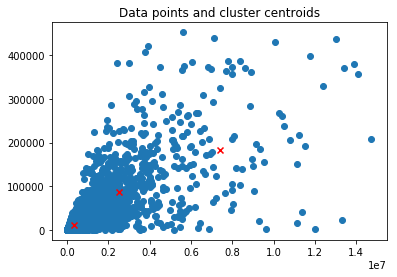

In [63]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X['views'], X['likes']) 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [64]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.7463159360338092


In [66]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

In [67]:
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

In [68]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning:

No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



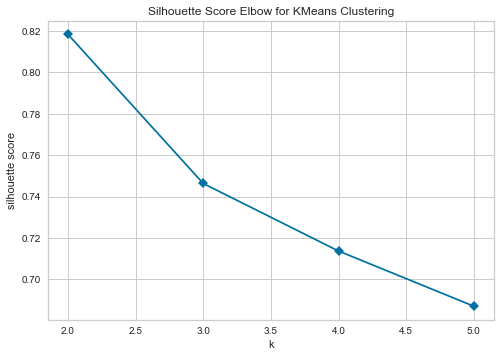

In [69]:
# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

<h3>Klaster terbaik ada di k 2.0</h3>